In [1]:
import numpy as np
import pandas as pd
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Reshape, GRU, RNN
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings(action='ignore')

import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

# DATA 로드 및 EDA

In [2]:
# load and uncompress.
with gzip.open('3d_array.pickle','rb') as f:
    arr = pickle.load(f)

In [3]:
arr.shape

(7799, 690, 10)

In [4]:
label = np.load("3d_array_label.npy")

In [5]:
label.shape

(7799, 1)

In [6]:
label_2d = np.load("3d_array_label_2d.npy")

In [7]:
arr.sum()

771616.0

In [8]:
arr.sum()/(7799*690*10)

0.014338813411604237

In [9]:
arr1 = arr.reshape(arr.shape[0], arr.shape[2], arr.shape[1])
arr1.shape

(7799, 10, 690)

In [10]:
arr1[0,:,:].sum()

77.0

# 데이터 나누기

In [11]:
arr1.shape[0] * 0.7

5459.299999999999

In [12]:
# 5500을 기준으로 split
X_train = arr1[:5500,:,:]
y_train = label[:5500,:]
# y_train = label_2d[:5500,:]


X_test = arr1[5500:,:,:]
y_test = label[5500:,:]
# y_test = label_2d[5500:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5500, 10, 690), (5500, 1), (2299, 10, 690), (2299, 1))

In [13]:
label.sum()/7799

0.6122579817925375

# LSTM

In [37]:
from keras.regularizers import l2

In [38]:
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr1.shape[1], arr1.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr1.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 10, 12)            33744     
_________________________________________________________________
lstm_12 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=256, epochs=500,  callbacks=[early_stop])

Epoch 1/500
17/17 [==============================] - 3s 43ms/step - loss: 0.7730 - acc: 0.6485 - val_loss: 0.7872 - val_acc: 0.5782
Epoch 2/500
17/17 [==============================] - 0s 13ms/step - loss: 0.6566 - acc: 0.7084 - val_loss: 0.7306 - val_acc: 0.5898
Epoch 3/500
17/17 [==============================] - 0s 12ms/step - loss: 0.6171 - acc: 0.7182 - val_loss: 0.6872 - val_acc: 0.6771
Epoch 4/500
17/17 [==============================] - 0s 13ms/step - loss: 0.5827 - acc: 0.7687 - val_loss: 0.7373 - val_acc: 0.6618
Epoch 5/500
17/17 [==============================] - 0s 13ms/step - loss: 0.5682 - acc: 0.7665 - val_loss: 0.6563 - val_acc: 0.7076
Epoch 6/500
17/17 [==============================] - 0s 13ms/step - loss: 0.5455 - acc: 0.7793 - val_loss: 0.6929 - val_acc: 0.6909
Epoch 7/500
17/17 [==============================] - 0s 13ms/step - loss: 0.5328 - acc: 0.7852 - val_loss: 0.7060 - val_acc: 0.6916
Epoch 8/500
17/17 [==============================] - 0s 12ms/step - loss: 0.

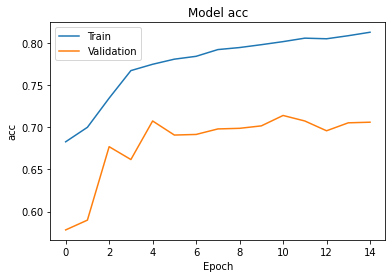

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# LSTM 2

In [67]:
arr1.shape

(7799, 10, 690)

In [191]:
lstm = Sequential()
lstm.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(arr1.shape[1], arr1.shape[2])))
# lstm.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(8, arr1.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 8)                 22368     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 22,377
Trainable params: 22,377
Non-trainable params: 0
_________________________________________________________________
None


In [192]:
arr1.shape[2]

690

In [194]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=1024, epochs=200)#,  callbacks=[early_stop])

Epoch 1/200
5/5 [==============================] - 2s 98ms/step - loss: 0.3026 - acc: 0.8809 - val_loss: 0.6870 - val_acc: 0.7105
Epoch 2/200
5/5 [==============================] - 0s 28ms/step - loss: 0.3072 - acc: 0.8755 - val_loss: 0.7053 - val_acc: 0.6989
Epoch 3/200
5/5 [==============================] - 0s 24ms/step - loss: 0.3084 - acc: 0.8701 - val_loss: 0.6872 - val_acc: 0.7076
Epoch 4/200
5/5 [==============================] - 0s 26ms/step - loss: 0.3104 - acc: 0.8783 - val_loss: 0.6719 - val_acc: 0.7025
Epoch 5/200
5/5 [==============================] - 0s 23ms/step - loss: 0.3041 - acc: 0.8863 - val_loss: 0.6740 - val_acc: 0.7069
Epoch 6/200
5/5 [==============================] - 0s 25ms/step - loss: 0.3098 - acc: 0.8813 - val_loss: 0.6833 - val_acc: 0.7076
Epoch 7/200
5/5 [==============================] - 0s 23ms/step - loss: 0.3071 - acc: 0.8783 - val_loss: 0.6886 - val_acc: 0.7076
Epoch 8/200
5/5 [==============================] - 0s 24ms/step - loss: 0.3021 - acc: 0.88

5/5 [==============================] - 0s 23ms/step - loss: 0.2544 - acc: 0.9120 - val_loss: 0.7679 - val_acc: 0.6960
Epoch 126/200
5/5 [==============================] - 0s 23ms/step - loss: 0.2512 - acc: 0.9143 - val_loss: 0.7648 - val_acc: 0.6960
Epoch 127/200
5/5 [==============================] - 0s 22ms/step - loss: 0.2441 - acc: 0.9170 - val_loss: 0.7690 - val_acc: 0.6975
Epoch 128/200
5/5 [==============================] - 0s 22ms/step - loss: 0.2437 - acc: 0.9142 - val_loss: 0.7826 - val_acc: 0.7011
Epoch 129/200
5/5 [==============================] - 0s 24ms/step - loss: 0.2423 - acc: 0.9148 - val_loss: 0.7672 - val_acc: 0.6982
Epoch 130/200
5/5 [==============================] - 0s 25ms/step - loss: 0.2483 - acc: 0.9154 - val_loss: 0.7742 - val_acc: 0.6989
Epoch 131/200
5/5 [==============================] - 0s 24ms/step - loss: 0.2495 - acc: 0.9135 - val_loss: 0.7763 - val_acc: 0.7004
Epoch 132/200
5/5 [==============================] - 0s 22ms/step - loss: 0.2430 - acc: 0.

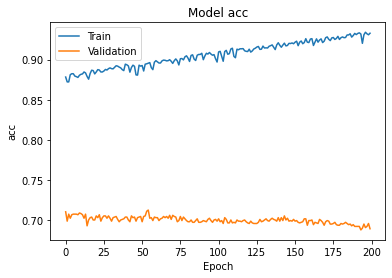

In [195]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

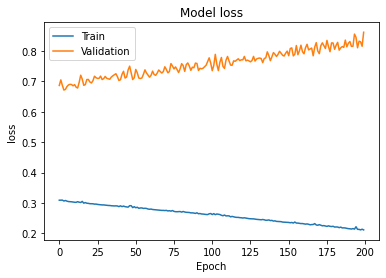

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [197]:
pred = lstm.predict(X_test)

In [198]:
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [199]:
pred.sum()

1641.0

In [200]:
y_test.sum()

1098

In [201]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.622879512831666


In [202]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['acc'])

# Fitting the RNN to the Training set
# history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=100)#,  callbacks=[early_stop])

Epoch 1/100
33/33 [==============================] - 5s 52ms/step - loss: 1.6324 - acc: 0.4754 - val_loss: 0.6227 - val_acc: 0.6320
Epoch 2/100
33/33 [==============================] - 1s 27ms/step - loss: 0.5904 - acc: 0.7119 - val_loss: 0.7751 - val_acc: 0.6131
Epoch 3/100
33/33 [==============================] - 1s 28ms/step - loss: 0.5520 - acc: 0.7361 - val_loss: 0.6380 - val_acc: 0.6218
Epoch 4/100
33/33 [==============================] - 1s 28ms/step - loss: 0.5063 - acc: 0.7365 - val_loss: 0.6044 - val_acc: 0.6553
Epoch 5/100
33/33 [==============================] - 1s 28ms/step - loss: 0.5145 - acc: 0.7467 - val_loss: 0.7425 - val_acc: 0.6349
Epoch 6/100
33/33 [==============================] - 1s 28ms/step - loss: 0.4870 - acc: 0.7486 - val_loss: 0.6801 - val_acc: 0.6662
Epoch 7/100
33/33 [==============================] - 1s 28ms/step - loss: 0.4539 - acc: 0.7753 - val_loss: 0.7126 - val_acc: 0.6800
Epoch 8/100
33/33 [==============================] - 1s 28ms/step - loss: 0.

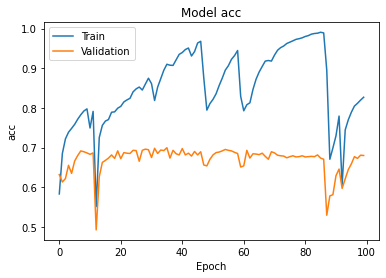

In [205]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

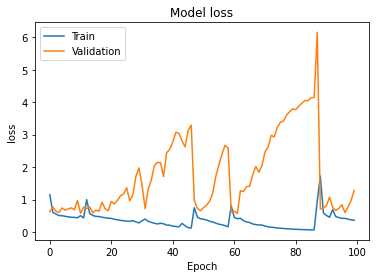

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [241]:
model = Sequential()
model.add(LSTM(100, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 100)               316400    
_________________________________________________________________
dense_51 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_52 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 322,996
Trainable params: 322,996
Non-trainable params: 0
_________________________________________________________________


In [242]:
for i in range(1,10000):
    if 7799%i == 0:
        print(i)

1
11
709
7799


In [243]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=709, epochs=100, shuffle=False)#,  callbacks=[early_stop])

Epoch 1/100
6/6 [==============================] - 2s 112ms/step - loss: 0.6505 - acc: 0.6993 - val_loss: 0.6848 - val_acc: 0.5782
Epoch 2/100
6/6 [==============================] - 0s 50ms/step - loss: 0.5556 - acc: 0.6977 - val_loss: 0.6365 - val_acc: 0.5782
Epoch 3/100
6/6 [==============================] - 0s 49ms/step - loss: 0.5352 - acc: 0.6978 - val_loss: 0.6288 - val_acc: 0.5833
Epoch 4/100
6/6 [==============================] - 0s 49ms/step - loss: 0.5175 - acc: 0.7168 - val_loss: 0.6246 - val_acc: 0.6335
Epoch 5/100
6/6 [==============================] - 0s 49ms/step - loss: 0.5001 - acc: 0.7525 - val_loss: 0.6134 - val_acc: 0.6727
Epoch 6/100
6/6 [==============================] - 0s 49ms/step - loss: 0.4907 - acc: 0.7700 - val_loss: 0.6073 - val_acc: 0.6924
Epoch 7/100
6/6 [==============================] - 0s 50ms/step - loss: 0.4778 - acc: 0.7747 - val_loss: 0.6009 - val_acc: 0.7033
Epoch 8/100
6/6 [==============================] - 0s 50ms/step - loss: 0.4644 - acc: 0.7

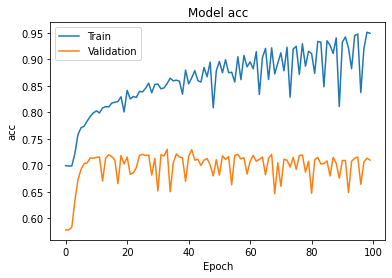

In [244]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

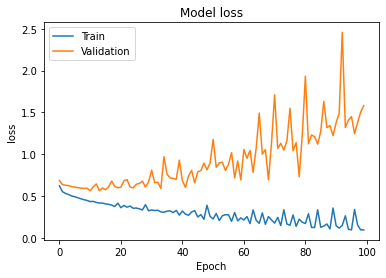

In [245]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [263]:
model = Sequential()
model.add(LSTM(12, input_shape = (X_train.shape[1], X_train.shape[2])))
# model.add(Dense(6))
# model.add(Dropout(0.9))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_95 (LSTM)               (None, 12)                33744     
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 13        
Total params: 33,757
Trainable params: 33,757
Non-trainable params: 0
_________________________________________________________________


In [284]:
model = Sequential()
model.add(LSTM(100, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 100)               316400    
_________________________________________________________________
dense_74 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_75 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_76 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 11        
Total params: 322,996
Trainable params: 322,996
Non-trainable params: 0
_________________________________________________________________


In [285]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min',patience=20)
history = model.fit(X_train, y_train, epochs=12, batch_size=790, validation_split=0.1, shuffle=False)#,  callbacks=[es])

Epoch 1/12
7/7 [==============================] - 2s 145ms/step - loss: 0.6677 - acc: 0.5797 - val_loss: 0.7073 - val_acc: 0.5073
Epoch 2/12
7/7 [==============================] - 0s 44ms/step - loss: 0.5649 - acc: 0.6926 - val_loss: 0.6922 - val_acc: 0.5073
Epoch 3/12
7/7 [==============================] - 0s 44ms/step - loss: 0.5360 - acc: 0.6973 - val_loss: 0.6880 - val_acc: 0.5491
Epoch 4/12
7/7 [==============================] - 0s 44ms/step - loss: 0.5143 - acc: 0.7442 - val_loss: 0.6953 - val_acc: 0.5873
Epoch 5/12
7/7 [==============================] - 0s 44ms/step - loss: 0.4967 - acc: 0.7641 - val_loss: 0.6767 - val_acc: 0.6255
Epoch 6/12
7/7 [==============================] - 0s 44ms/step - loss: 0.4824 - acc: 0.7750 - val_loss: 0.6807 - val_acc: 0.6309
Epoch 7/12
7/7 [==============================] - 0s 43ms/step - loss: 0.4710 - acc: 0.7835 - val_loss: 0.6628 - val_acc: 0.6509
Epoch 8/12
7/7 [==============================] - 0s 44ms/step - loss: 0.4688 - acc: 0.7792 - va

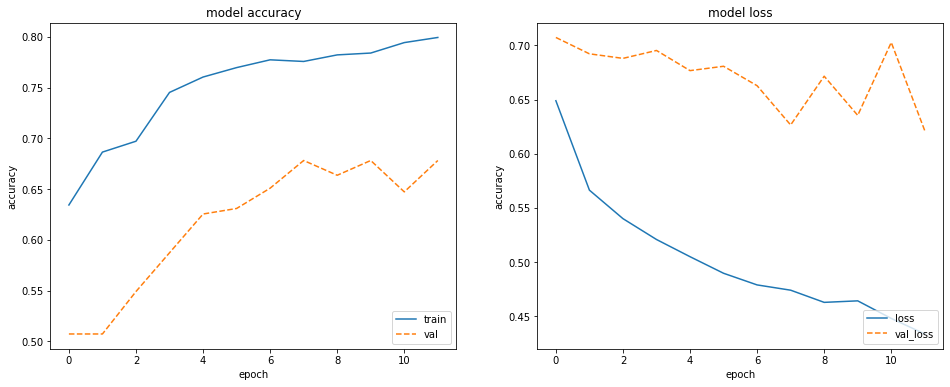

In [286]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc'],'--')
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'val'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'],"--")
axes[1].set_title('model loss')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['loss', 'val_loss'], loc='lower right')

In [287]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [289]:
print(pred.sum())
print(y_test.sum())
print(pred.shape)
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

1641.0
1098
(2299, 1)
정확도 : 0.622879512831666


# 틀린 환자 확인

In [293]:
pred1 = pd.DataFrame(pred)
y_test1 = pd.DataFrame(y_test)

In [302]:
pred1.iloc[0]==y_test1.iloc[0]

0    True
Name: 0, dtype: bool

In [313]:
a = pred1-y_test1
a[a[0]==1].index

Int64Index([   1,    2,    4,    5,   12,   13,   18,   22,   24,   28,
            ...
            2267, 2271, 2273, 2274, 2275, 2278, 2286, 2287, 2288, 2294],
           dtype='int64', length=705)

In [320]:
X_test[1,:,:].sum(axis=1)

array([36., 30., 27.,  0.,  0., 18., 27.,  0.,  0.,  2.])

In [321]:
X_test[3,:,:].sum(axis=1)

array([ 3., 18., 14.,  0.,  6., 19., 38.,  0.,  0.,  0.])